# One Parameter Persistent Homology

In this notebook and the others accompanying it in this repo, we are replicating the results in [Persistent homology of quantum entanglement](https://arxiv.org/abs/2110.10214) starting from graph states with controlled random unitary matrix gates as entangling gates between qubits. Also see [Interaction graph-based profiling of quantum benchmarks for improving quantum circuit mapping techniques](https://arxiv.org/abs/2212.06640). Given a distance matrix (or weighted adjacency matrix used to give distance in some way eg. inverse mutual information) we can compute one-parameter persistent homology by using the following Gudhi code. 

usetex mode requires TeX.


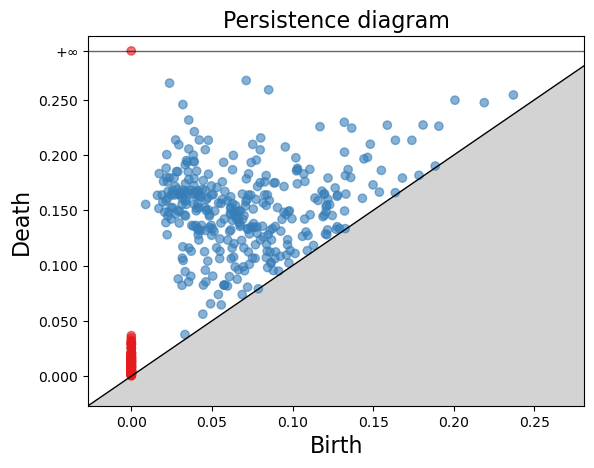

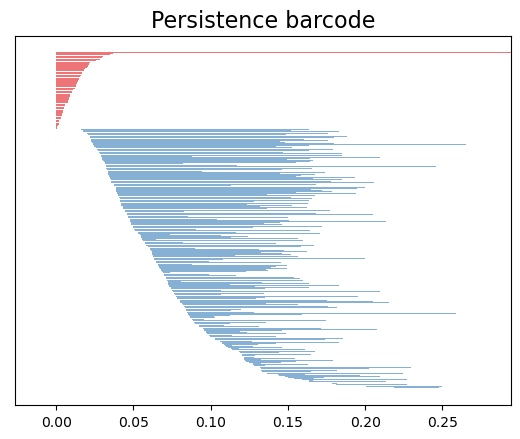

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Generate a random distance matrix (should use weighted adjacency matrix from circuit)
N = 100
D = np.random.rand(N, N)
D = np.triu(D) + np.triu(D, 1).T  # make it symmetric
np.fill_diagonal(D, 0)  # set diagonal to zero

# Compute the persistence homology of the distance matrix
rips_complex = gudhi.RipsComplex(distance_matrix=D)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence(homology_coeff_field=2)

# Plot the persistence diagram
gudhi.plot_persistence_diagram(diag)
plt.show()

# Plot the persistence barcode
gudhi.plot_persistence_barcode(diag)
plt.show()
